In [85]:
from google.colab import files


uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease (2).csv


# New Section

In [87]:
import pandas as pd
import numpy as np
chronic_kidney = pd.read_csv(r'kidney_disease.csv')



In [88]:
chronic_kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.00,391.00,388.00,353.00,354.00,351.00,356.00,381.00,383.00,313.00,312.00,348.00
mean,199.50,51.48,76.47,1.02,1.02,0.45,148.04,57.43,3.07,137.53,4.63,12.53
std,115.61,17.17,13.68,0.01,1.35,1.10,79.28,50.50,5.74,10.41,3.19,2.91
min,0.00,2.00,50.00,1.00,0.00,0.00,22.00,1.50,0.40,4.50,2.50,3.10
25%,99.75,42.00,70.00,1.01,0.00,0.00,99.00,27.00,0.90,135.00,3.80,10.30
50%,199.50,55.00,80.00,1.02,0.00,0.00,121.00,42.00,1.30,138.00,4.40,12.65
75%,299.25,64.50,80.00,1.02,2.00,0.00,163.00,66.00,2.80,142.00,4.90,15.00
max,399.00,90.00,180.00,1.02,5.00,5.00,490.00,391.00,76.00,163.00,47.00,17.80


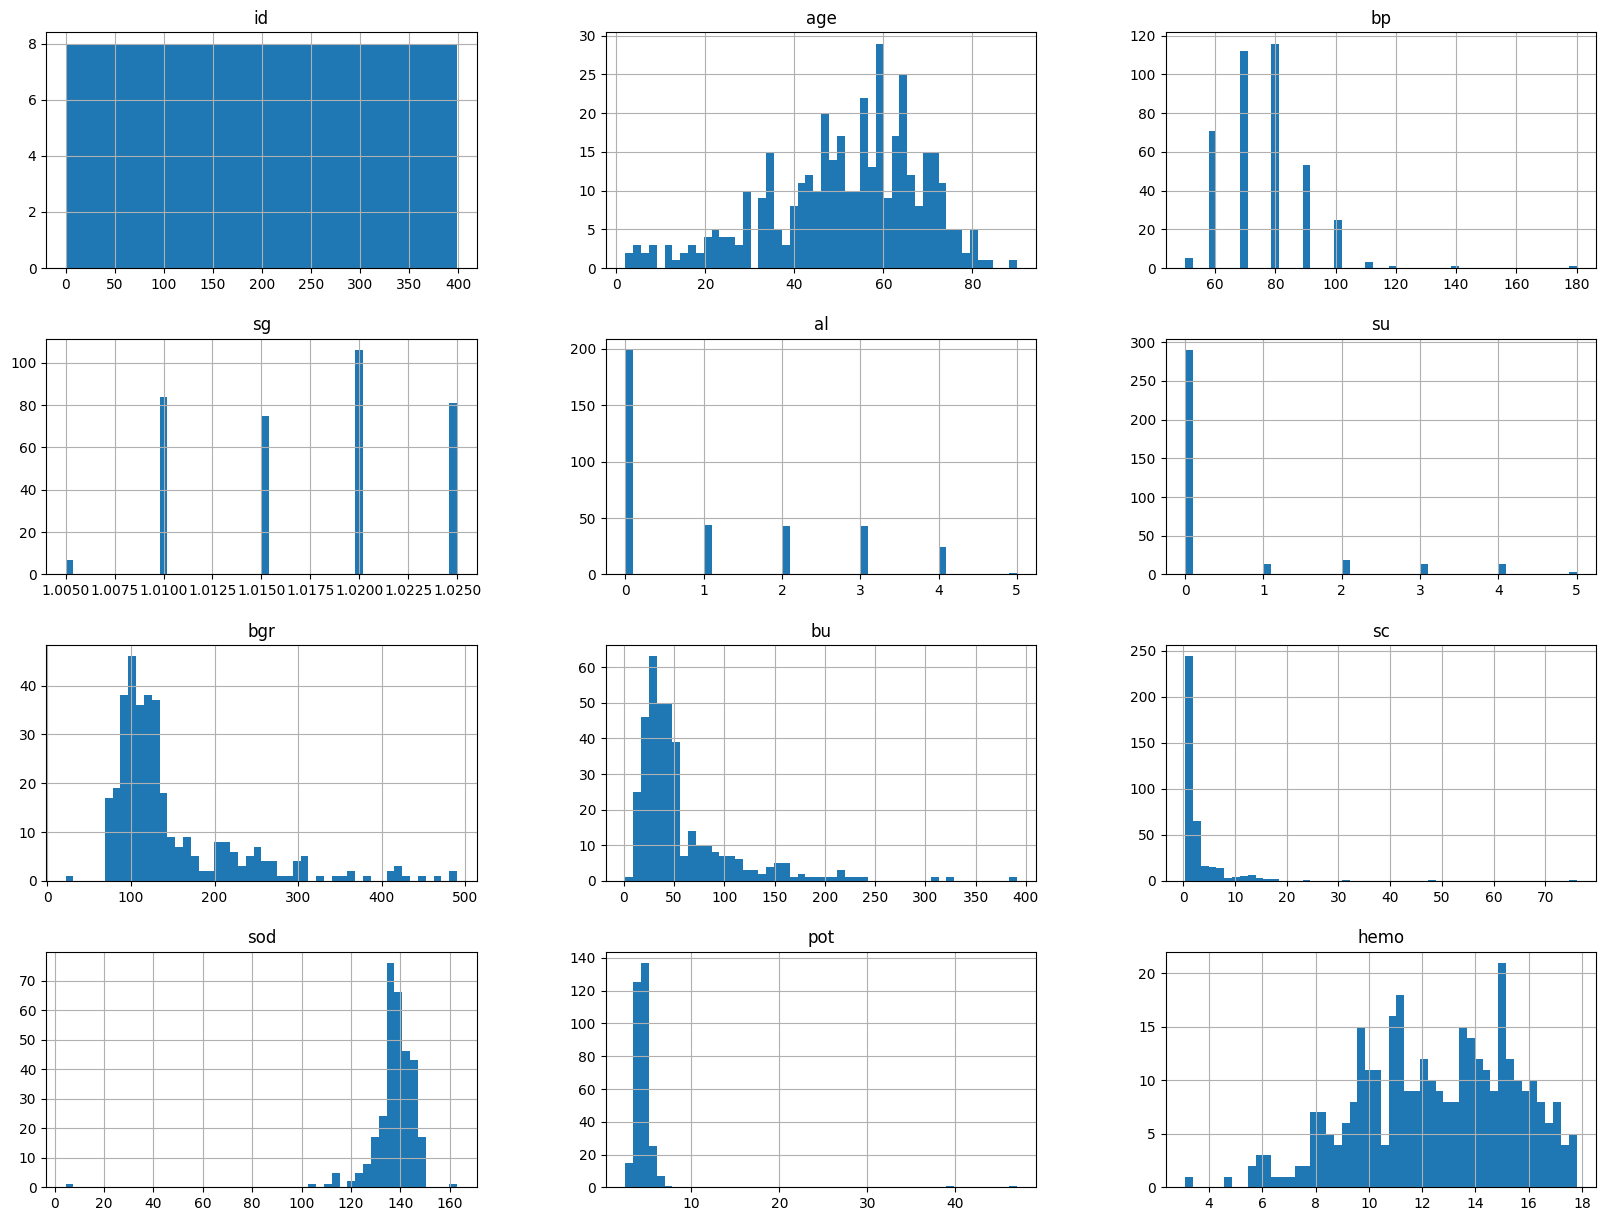

In [89]:
from matplotlib import pyplot
from pandas import read_csv
d = chronic_kidney
d.hist(bins=50, figsize=(20, 15))
pyplot.show()

In [90]:
chronic_kidney.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [91]:
print(chronic_kidney['rbc'].unique())
print(chronic_kidney['pc'].unique())
print(chronic_kidney['pcc'].unique())
print(chronic_kidney['ba'].unique())
print(chronic_kidney['pcv'].unique())
print(chronic_kidney['wc'].unique())
print(chronic_kidney['rc'].unique())
print(chronic_kidney['htn'].unique())
print(chronic_kidney['dm'].unique())
print(chronic_kidney['cad'].unique())
print(chronic_kidney['appet'].unique())
print(chronic_kidney['pe'].unique())
print(chronic_kidney['ane'].unique())
print(chronic_kidney['classification'].unique())

[nan 'normal' 'abnormal']
['normal' 'abnormal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200'

In [92]:
  chronic_kidney['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}, inplace=True)
  chronic_kidney['cad'].replace(to_replace={'\tno':'no'}, inplace=True)
  chronic_kidney['classification'].replace(to_replace={'ckd\t':'ckd'},inplace=True)
  for i in ['pcv','wc','rc']:
      chronic_kidney[i] = chronic_kidney[i].str.extract('(\d+\.\d+|\d+)').astype(float)
  chronic_kidney['classification'] = chronic_kidney['classification'].map({'ckd':1,'notckd':0})
  chronic_kidney['htn'] = chronic_kidney['htn'].map({'yes':1,'no':0})
  chronic_kidney['dm'] = chronic_kidney['dm'].map({'yes':1,'no':0})
  chronic_kidney['cad'] = chronic_kidney['cad'].map({'yes':1,'no':0})
  chronic_kidney['appet'] = chronic_kidney['appet'].map({'good':1,'poor':0})
  chronic_kidney['ane'] = chronic_kidney['ane'].map({'yes':1,'no':0})
  chronic_kidney['pe'] = chronic_kidney['pe'].map({'yes':1,'no':0})
  chronic_kidney['ba'] = chronic_kidney['ba'].map({'present':1,'notpresent':0})
  chronic_kidney['pcc'] = chronic_kidney['pcc'].map({'present':1,'notpresent':0})
  chronic_kidney['pc'] = chronic_kidney['pc'].map({'abnormal':1,'normal':0})
  chronic_kidney['rbc'] = chronic_kidney['rbc'].map({'abnormal':1,'normal':0})


In [93]:
chronic_kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,NaN,0.00,0.00,0.00,...,44.00,7800.00,5.20,1.00,1.00,0.00,1.00,0.00,0.00,1
1,1,7.00,50.00,1.02,4.00,0.00,NaN,0.00,0.00,0.00,...,38.00,6000.00,NaN,0.00,0.00,0.00,1.00,0.00,0.00,1
2,2,62.00,80.00,1.01,2.00,3.00,0.00,0.00,0.00,0.00,...,31.00,7500.00,NaN,0.00,1.00,0.00,0.00,0.00,1.00,1
3,3,48.00,70.00,1.00,4.00,0.00,0.00,1.00,1.00,0.00,...,32.00,6700.00,3.90,1.00,0.00,0.00,0.00,1.00,1.00,1
4,4,51.00,80.00,1.01,2.00,0.00,0.00,0.00,0.00,0.00,...,35.00,7300.00,4.60,0.00,0.00,0.00,1.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.00,80.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,47.00,6700.00,4.90,0.00,0.00,0.00,1.00,0.00,0.00,0
396,396,42.00,70.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,54.00,7800.00,6.20,0.00,0.00,0.00,1.00,0.00,0.00,0
397,397,12.00,80.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,49.00,6600.00,5.40,0.00,0.00,0.00,1.00,0.00,0.00,0
398,398,17.00,60.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,51.00,7200.00,5.90,0.00,0.00,0.00,1.00,0.00,0.00,0


In [94]:
chronic_kidney['classification'].value_counts()

classification
1    250
0    150
Name: count, dtype: int64

Filling missing values-KNN Imputation

In [95]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_filled = imputer.fit_transform(chronic_kidney)
print(df_filled)

[[  0.  48.  80. ...   0.   0.   1.]
 [  1.   7.  50. ...   0.   0.   1.]
 [  2.  62.  80. ...   0.   1.   1.]
 ...
 [397.  12.  80. ...   0.   0.   0.]
 [398.  17.  60. ...   0.   0.   0.]
 [399.  58.  80. ...   0.   0.   0.]]


In [96]:
df_filled3=pd.DataFrame(df_filled)
df_filled3

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.00,48.00,80.00,1.02,1.00,0.00,0.67,0.00,0.00,0.00,...,44.00,7800.00,5.20,1.00,1.00,0.00,1.00,0.00,0.00,1.00
1,1.00,7.00,50.00,1.02,4.00,0.00,0.67,0.00,0.00,0.00,...,38.00,6000.00,4.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
2,2.00,62.00,80.00,1.01,2.00,3.00,0.00,0.00,0.00,0.00,...,31.00,7500.00,3.37,0.00,1.00,0.00,0.00,0.00,1.00,1.00
3,3.00,48.00,70.00,1.00,4.00,0.00,0.00,1.00,1.00,0.00,...,32.00,6700.00,3.90,1.00,0.00,0.00,0.00,1.00,1.00,1.00
4,4.00,51.00,80.00,1.01,2.00,0.00,0.00,0.00,0.00,0.00,...,35.00,7300.00,4.60,0.00,0.00,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.00,55.00,80.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,47.00,6700.00,4.90,0.00,0.00,0.00,1.00,0.00,0.00,0.00
396,396.00,42.00,70.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,54.00,7800.00,6.20,0.00,0.00,0.00,1.00,0.00,0.00,0.00
397,397.00,12.00,80.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,49.00,6600.00,5.40,0.00,0.00,0.00,1.00,0.00,0.00,0.00
398,398.00,17.00,60.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,51.00,7200.00,5.90,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [97]:
df_filled3.columns=['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr','bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane', 'classification']


In [98]:
ckd=df_filled3
ckd

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.00,48.00,80.00,1.02,1.00,0.00,0.67,0.00,0.00,0.00,...,44.00,7800.00,5.20,1.00,1.00,0.00,1.00,0.00,0.00,1.00
1,1.00,7.00,50.00,1.02,4.00,0.00,0.67,0.00,0.00,0.00,...,38.00,6000.00,4.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
2,2.00,62.00,80.00,1.01,2.00,3.00,0.00,0.00,0.00,0.00,...,31.00,7500.00,3.37,0.00,1.00,0.00,0.00,0.00,1.00,1.00
3,3.00,48.00,70.00,1.00,4.00,0.00,0.00,1.00,1.00,0.00,...,32.00,6700.00,3.90,1.00,0.00,0.00,0.00,1.00,1.00,1.00
4,4.00,51.00,80.00,1.01,2.00,0.00,0.00,0.00,0.00,0.00,...,35.00,7300.00,4.60,0.00,0.00,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.00,55.00,80.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,47.00,6700.00,4.90,0.00,0.00,0.00,1.00,0.00,0.00,0.00
396,396.00,42.00,70.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,54.00,7800.00,6.20,0.00,0.00,0.00,1.00,0.00,0.00,0.00
397,397.00,12.00,80.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,49.00,6600.00,5.40,0.00,0.00,0.00,1.00,0.00,0.00,0.00
398,398.00,17.00,60.00,1.02,0.00,0.00,0.00,0.00,0.00,0.00,...,51.00,7200.00,5.90,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [99]:
df_filled3.drop(columns=['id', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'sc', 'sod', 'pot', 'pcv', 'wc', 'rc', 'cad',
        'pe', 'ane'],inplace=True)

Split test and train data

In [100]:
x = df_filled3.iloc[:,:9].values
y = df_filled3['classification'].values

In [101]:
print(x.shape)
print(y.shape)

(400, 9)
(400,)


In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [103]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
def confusion_metrics (conf_matrix):
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]

    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    conf_misclassification = 1- conf_accuracy
    conf_sensitivity = (TP / float(TP + FN))
    conf_specificity = (TN / float(TN + FP))
    conf_precision = (TN / float(TN + FP))
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print(f'Accuracy            : {round(conf_accuracy,3)}')
    print(f'Classification Error: {round(conf_misclassification,3)}')
    print(f'Sensitivity         : {round(conf_sensitivity,3)}')
    print(f'Specificity         : {round(conf_specificity,3)}')
    print(f'Precision           : {round(conf_precision,3)}')
    print(f'f_1 Score           : {round(conf_f1,3)}')

NAIVE BAYES

In [104]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
nb_preds= nb.predict(x_test)
confusion_metrics(confusion_matrix(y_test,nb_preds))
naiveb=accuracy_score(y_test,nb_preds)
%time

Accuracy            : 0.95
Classification Error: 0.05
Sensitivity         : 0.917
Specificity         : 1.0
Precision           : 1.0
f_1 Score           : 0.957
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs



RANDOM FOREST




In [105]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators =100, random_state = 0)
rf_f=rf.fit(x_train,y_train)
rf_preds=rf.predict(x_test)
confusion_metrics(confusion_matrix(y_test,rf_preds))
raf=accuracy_score(y_test,rf_preds)
%time


Accuracy            : 1.0
Classification Error: 0.0
Sensitivity         : 1.0
Specificity         : 1.0
Precision           : 1.0
f_1 Score           : 1.0
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [106]:
pred=rf_f.predict_proba(x)
print(pred)
df2 = pd.DataFrame(pred)

[[0.07 0.93]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.09 0.91]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.03 0.97]
 [0.01 0.99]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]

Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1)
lr.fit(x_train, y_train)
lr_preds = lr.predict(x_test)
lr_preds = lr.predict(x_test)
confusion_metrics(confusion_matrix(y_test,lr_preds))
log=accuracy_score(y_test,lr_preds)
%time

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Accuracy            : 0.958
Classification Error: 0.042
Sensitivity         : 0.958
Specificity         : 0.958
Precision           : 0.958
f_1 Score           : 0.958
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 18.6 µs


In [108]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)
pred1=lr.predict_proba(x)
print(pred1)
df1 = pd.DataFrame(pred1)

[[0.12 0.88]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.44 0.56]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.02 0.98]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.03 0.97]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.19 0.81]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.16 0.84]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.08 0.92]
 [0.03 0.97]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.04 0.96]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.04 0.96]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.34 0.66]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.93 0.07]
 [0.38 0.62]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]

Support Vector Machine

In [109]:
    from sklearn.metrics import confusion_matrix
    from sklearn import svm
    SVM = svm.SVC(kernel='linear')
    SVM.fit(x_train, y_train)
    y_pred = SVM.predict(x_test)
    confusion_metrics(confusion_matrix(y_test,y_pred))
    suvm=accuracy_score(y_test,y_pred)
    %time

Accuracy            : 0.958
Classification Error: 0.042
Sensitivity         : 0.958
Specificity         : 0.958
Precision           : 0.958
f_1 Score           : 0.958
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


K-Nearest Neighbors

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

knn.fit(x_train, y_train)

knn_preds = knn.predict(x_test)

confusion_metrics(confusion_matrix(y_test,knn_preds))
knear=accuracy_score(y_test,knn_preds)
%time

Accuracy            : 0.867
Classification Error: 0.133
Sensitivity         : 0.875
Specificity         : 0.854
Precision           : 0.854
f_1 Score           : 0.864
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


Feed forward neural network

In [111]:
import math
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
data=ckd
ckd

,age,bp,sg,al,bu,hemo,htn,dm,appet,classification
0,48.00,80.00,1.02,1.00,36.00,15.40,1.00,1.00,1.00,1.00
1,7.00,50.00,1.02,4.00,18.00,11.30,0.00,0.00,1.00,1.00
2,62.00,80.00,1.01,2.00,53.00,9.60,0.00,1.00,0.00,1.00
3,48.00,70.00,1.00,4.00,56.00,11.20,1.00,0.00,0.00,1.00
4,51.00,80.00,1.01,2.00,26.00,11.60,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...
395,55.00,80.00,1.02,0.00,49.00,15.70,0.00,0.00,1.00,0.00
396,42.00,70.00,1.02,0.00,31.00,16.50,0.00,0.00,1.00,0.00
397,12.00,80.00,1.02,0.00,26.00,15.80,0.00,0.00,1.00,0.00
398,17.00,60.00,1.02,0.00,50.00,14.20,0.00,0.00,1.00,0.00


In [112]:
n_test = int(math.ceil(len(data) * 0.3))
random.seed(42)
test_ixs = random.sample(list(range(len(data))), n_test)
train_ixs = [ix for ix in range(len(data)) if ix not in test_ixs]
train = data.iloc[train_ixs, :]
test = data.iloc[test_ixs, :]
print(len(train))
print(len(test))

280
120


In [113]:
features = ['age', 'bp', 'sg', 'al',
       'bu','hemo','htn','dm','appet']
response = 'classification'
x_train = train[features]
y_train = train[response]
x_test = test[features]
y_test = test[response]

In [114]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [115]:
hidden_units = 10
activation = 'relu'
learning_rate = 0.01
epochs = 10
batch_size = 17

In [116]:
model = models.Sequential()

# hidden layer
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units,
                       activation=activation))

model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units,
                       activation=activation))

# output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


Epoch 1/10
17/17 [==============================] - 1s 3ms/step - loss: 0.6956 - accuracy: 0.4929
Epoch 2/10
17/17 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6250
Epoch 3/10
17/17 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.6393
Epoch 4/10
17/17 [==============================] - 0s 4ms/step - loss: 0.6660 - accuracy: 0.6393
Epoch 5/10
17/17 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.6393
Epoch 6/10
17/17 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6393
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 0.6547 - accuracy: 0.6393
Epoch 8/10
17/17 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6393
Epoch 9/10
17/17 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.6393
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6665 - accuracy: 0.5917
Training accuracy: 0.

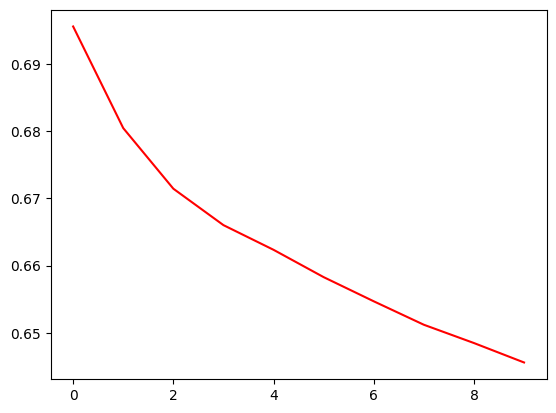

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [117]:
history = model.fit(x_train, y_train, epochs=10, batch_size=17)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()
%time

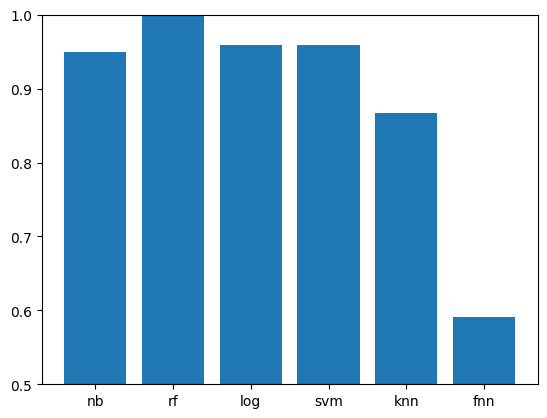

In [119]:
from random import seed
from random import randint
from matplotlib import pyplot

seed(1)
plt.ylim(0.50, 1.0)

x = ['nb', 'rf', 'log','svm','knn','fnn']

y = [naiveb, raf, log, suvm, knear, test_acc]

pyplot.bar(x, y)

pyplot.show()

Perceptron

In [120]:
data = [df1[0], df2[0],df_filled3['classification']]

In [121]:
headers = ["x", "y","label"]

In [122]:
df = pd.concat(data, axis=1, keys=headers)
df['label'].replace(to_replace={1.0:-1.0,0.0:1.0}, inplace=True)

df

,x,y,label
0,0.12,0.07,-1.00
1,0.00,0.00,-1.00
2,0.00,0.00,-1.00
3,0.00,0.00,-1.00
4,0.00,0.00,-1.00
...,...,...,...
395,0.98,0.99,1.00
396,1.00,1.00,1.00
397,0.97,0.94,1.00
398,0.97,0.99,1.00


In [123]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [124]:
df1 = pd.DataFrame(train)
df2 = pd.DataFrame(test)
df2

,x,y,label
262,0.96,0.97,1.00
103,0.00,0.00,-1.00
25,0.00,0.01,-1.00
325,0.75,1.00,1.00
335,0.98,1.00,1.00
...,...,...,...
38,0.00,0.00,-1.00
87,0.00,0.00,-1.00
192,0.03,0.05,-1.00
368,0.90,1.00,1.00


In [125]:
res=0
import random
import numpy as np
l_rate=0.01
n_epoch=20

In [126]:
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)):
		activation += weights[i + 1] * row[i]
	return 1 if activation >= 0.0 else -1

def train_weights(train, l_rate, n_epoch):
	weights = [np.round(random.uniform(-0.99,0.99),2) for i in range(3)]

	for epoch in range(n_epoch):
		for i in range(train.shape[0]):
			row=[train.iloc[i,0],train.iloc[i,1]]
			prediction=predict(row, weights)

			res=prediction*(((weights[1]*row[0])+(weights[2]*row[1]))+weights[0])


			if res<0:
			  weights[0] = weights[0] +(l_rate * prediction)
			  weights[1] = weights[1]+(l_rate*prediction*row[0])
			  weights[2] = weights[2]+(l_rate*prediction*row[1])


	return weights
l_rate = 0.1
n_epoch = 20

weights = train_weights(df1, l_rate, n_epoch)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


In [127]:
#PREDICTIONS
predictions=[]
for i in range(df2.shape[0]):
  row = [df2.iloc[i,0],df2.iloc[i,1]]
  pred=(((weights[1]*row[0])+(weights[2]*row[1]))+weights[0])
  if pred>=0:
    res=1
  else:
    res=-1
  predictions.append(res)
print(predictions)

[1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1]


In [128]:
perceptron=accuracy_score(df2['label'],predictions)
print("accuracy of perceptron:",perceptron)

accuracy of perceptron: 1.0


In [129]:
confusion_metrics(confusion_matrix(df2['label'],predictions))
perceptron=accuracy_score(df2['label'],predictions)


Accuracy            : 1.0
Classification Error: 0.0
Sensitivity         : 1.0
Specificity         : 1.0
Precision           : 1.0
f_1 Score           : 1.0


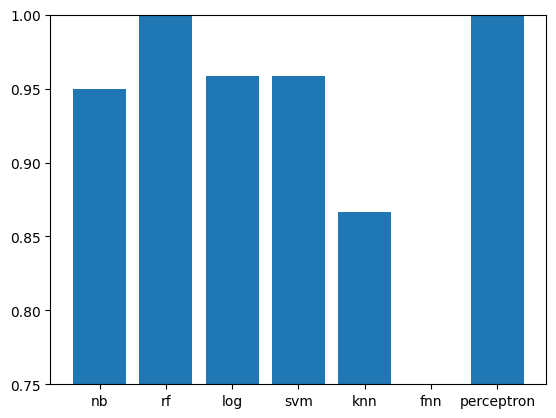

In [130]:
from random import seed
from random import randint
from matplotlib import pyplot

seed(1)
plt.ylim(0.75, 1.0)

x = ['nb', 'rf', 'log','svm','knn','fnn','perceptron']

y = [naiveb, raf, log, suvm, knear, test_acc, perceptron]

pyplot.bar(x, y)

pyplot.show()